In [18]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [19]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [20]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [21]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [22]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [23]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | busselton
Processing Record 2 of Set 13 | shimoda
Processing Record 3 of Set 13 | kamenka
Processing Record 4 of Set 13 | rikitea
Processing Record 5 of Set 13 | kerman
Processing Record 6 of Set 13 | mahebourg
Processing Record 7 of Set 13 | lokosovo
Processing Record 8 of Set 13 | hobart
Processing Record 9 of Set 13 | yamada
Processing Record 10 of Set 13 | ribeira grande
Processing Record 11 of Set 13 | kirovskiy
Processing Record 12 of Set 13 | nantucket
Processing Record 13 of Set 13 | upernavik
Processing Record 14 of Set 13 | castro
Processing Record 15 of Set 13 | meridian
Processing Record 16 of Set 13 | coffs harbour
Processing Record 17 of Set 13 | butaritari
Processing Record 18 of Set 13 | biak
Processing Record 19 of Set 13 | ushuaia
Processing Record 20 of Set 13 | tiksi
Processing Record 21 of Set 13 | port elizabeth
Processing Record 22 of Set 13 | bluff
Processing Record 23 of

Processing Record 35 of Set 16 | alugan
Processing Record 36 of Set 16 | arraial do cabo
Processing Record 37 of Set 16 | rio grande
Processing Record 38 of Set 16 | kismayo
Processing Record 39 of Set 16 | nikolskoye
Processing Record 40 of Set 16 | pauini
Processing Record 41 of Set 16 | gat
Processing Record 42 of Set 16 | qixingtai
Processing Record 43 of Set 16 | najran
Processing Record 44 of Set 16 | ancud
Processing Record 45 of Set 16 | bereda
Processing Record 46 of Set 16 | rio gallegos
Processing Record 47 of Set 16 | katsuura
Processing Record 48 of Set 16 | longyearbyen
Processing Record 49 of Set 16 | kloulklubed
Processing Record 50 of Set 16 | carnarvon
Processing Record 1 of Set 17 | tukrah
Processing Record 2 of Set 17 | moroni
Processing Record 3 of Set 17 | bosilegrad
Processing Record 4 of Set 17 | genhe
Processing Record 5 of Set 17 | saint-leu
Processing Record 6 of Set 17 | lata
Processing Record 7 of Set 17 | sibu
Processing Record 8 of Set 17 | dzhusaly
City 

Processing Record 19 of Set 20 | beringovskiy
Processing Record 20 of Set 20 | great yarmouth
Processing Record 21 of Set 20 | sinnamary
Processing Record 22 of Set 20 | ji-parana
City not found. Skipping...
Processing Record 23 of Set 20 | nyazepetrovsk
Processing Record 24 of Set 20 | watsa
Processing Record 25 of Set 20 | neon soulion
Processing Record 26 of Set 20 | nishihara
Processing Record 27 of Set 20 | north platte
Processing Record 28 of Set 20 | cockburn town
Processing Record 29 of Set 20 | san cristobal
Processing Record 30 of Set 20 | atar
Processing Record 31 of Set 20 | velyka mykhaylivka
Processing Record 32 of Set 20 | mumford
Processing Record 33 of Set 20 | coari
Processing Record 34 of Set 20 | wucheng
Processing Record 35 of Set 20 | rudbar
Processing Record 36 of Set 20 | banjarmasin
Processing Record 37 of Set 20 | pangkalanbuun
Processing Record 38 of Set 20 | mrirt
City not found. Skipping...
Processing Record 39 of Set 20 | gulshat
City not found. Skipping..

Processing Record 1 of Set 24 | sonamura
Processing Record 2 of Set 24 | cheremisinovo
Processing Record 3 of Set 24 | konice
Processing Record 4 of Set 24 | namibe
Processing Record 5 of Set 24 | mandera
Processing Record 6 of Set 24 | coracora
Processing Record 7 of Set 24 | dunayivtsi
City not found. Skipping...
Processing Record 8 of Set 24 | port hardy
Processing Record 9 of Set 24 | carndonagh
Processing Record 10 of Set 24 | tsiroanomandidy
Processing Record 11 of Set 24 | capinopolis
Processing Record 12 of Set 24 | jabiru
City not found. Skipping...
Processing Record 13 of Set 24 | vila velha
Processing Record 14 of Set 24 | mpophomeni
Processing Record 15 of Set 24 | camana
Processing Record 16 of Set 24 | san miguel de cauri
Processing Record 17 of Set 24 | seoul
Processing Record 18 of Set 24 | fevralsk
City not found. Skipping...
Processing Record 19 of Set 24 | salalah
Processing Record 20 of Set 24 | bonavista
Processing Record 21 of Set 24 | palmer
Processing Record 22 

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,70.09,48,20,9.91,AU,2022-01-26 02:18:50
1,Shimoda,34.6667,138.9500,50.11,73,100,6.42,JP,2022-01-26 02:18:50
2,Kamenka,51.3223,42.7678,2.16,100,93,4.56,RU,2022-01-26 02:18:51
3,Rikitea,-23.1203,-134.9692,78.28,76,100,15.88,PF,2022-01-26 02:18:51
4,Kerman,30.2832,57.0788,28.26,64,0,4.61,IR,2022-01-26 02:18:52
5,Mahebourg,-20.4081,57.7000,75.49,73,40,5.75,MU,2022-01-26 02:18:52
6,Lokosovo,61.1333,74.8167,-9.45,100,100,4.56,RU,2022-01-26 02:18:52
7,Hobart,-42.8794,147.3294,68.02,70,75,1.01,AU,2022-01-26 02:15:02
8,Yamada,39.4667,141.9500,39.69,54,100,2.35,JP,2022-01-26 02:14:15
9,Ribeira Grande,38.5167,-28.7000,59.88,79,100,6.80,PT,2022-01-26 02:18:53


In [26]:
#reorder the column
new_column_order=["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [27]:
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-01-26 02:18:50,-33.6500,115.3333,70.09,48,20,9.91
1,Shimoda,JP,2022-01-26 02:18:50,34.6667,138.9500,50.11,73,100,6.42
2,Kamenka,RU,2022-01-26 02:18:51,51.3223,42.7678,2.16,100,93,4.56
3,Rikitea,PF,2022-01-26 02:18:51,-23.1203,-134.9692,78.28,76,100,15.88
4,Kerman,IR,2022-01-26 02:18:52,30.2832,57.0788,28.26,64,0,4.61
5,Mahebourg,MU,2022-01-26 02:18:52,-20.4081,57.7000,75.49,73,40,5.75
6,Lokosovo,RU,2022-01-26 02:18:52,61.1333,74.8167,-9.45,100,100,4.56
7,Hobart,AU,2022-01-26 02:15:02,-42.8794,147.3294,68.02,70,75,1.01
8,Yamada,JP,2022-01-26 02:14:15,39.4667,141.9500,39.69,54,100,2.35
9,Ribeira Grande,PT,2022-01-26 02:18:53,38.5167,-28.7000,59.88,79,100,6.80


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

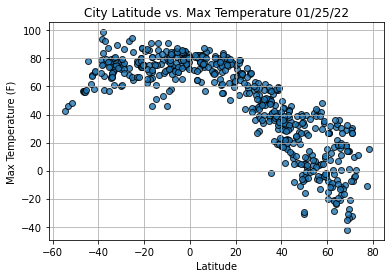

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

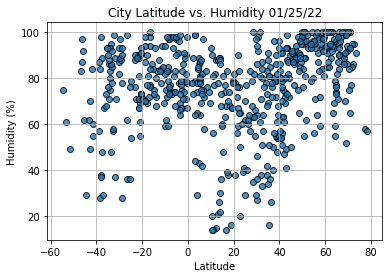

In [31]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

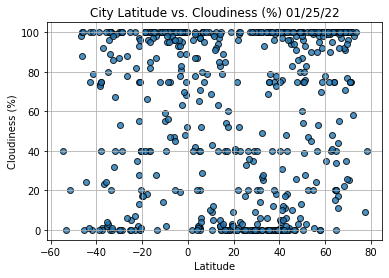

In [32]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

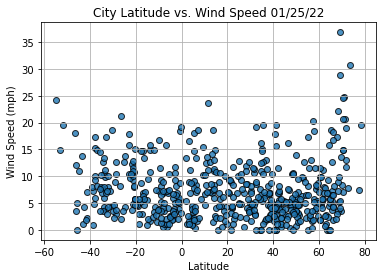

In [33]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Shimoda,JP,2022-01-26 02:18:50,34.6667,138.9500,50.11,73,100,6.42
2,Kamenka,RU,2022-01-26 02:18:51,51.3223,42.7678,2.16,100,93,4.56
4,Kerman,IR,2022-01-26 02:18:52,30.2832,57.0788,28.26,64,0,4.61
6,Lokosovo,RU,2022-01-26 02:18:52,61.1333,74.8167,-9.45,100,100,4.56
8,Yamada,JP,2022-01-26 02:14:15,39.4667,141.9500,39.69,54,100,2.35


In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

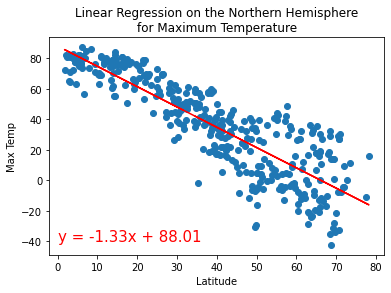

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere"
                        "\nfor Maximum Temperature", 'Max Temp',(0,-40))

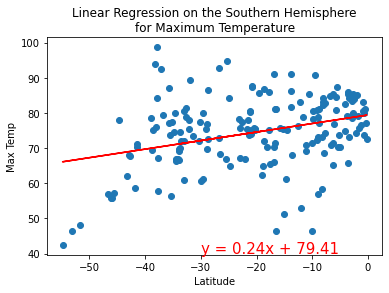

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere"
                        "\nfor Maximum Temperature", 'Max Temp',(-30,40))

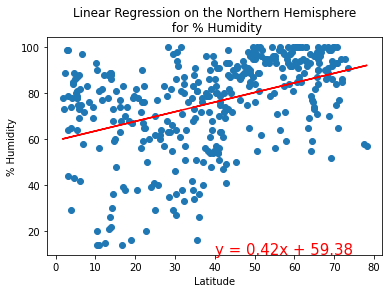

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere"
                       "\n for % Humidity", "% Humidity",(40,10))

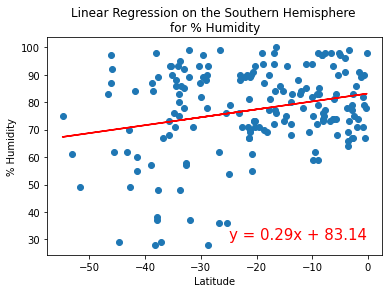

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n"
                        "for % Humidity", '% Humidity',(-25,30))

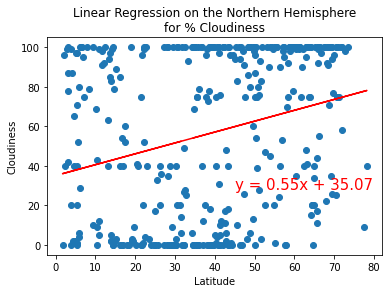

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere"
                        "\nfor % Cloudiness", 'Cloudiness',(45,28))

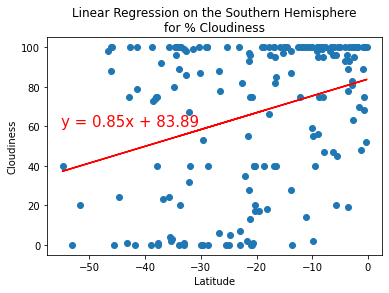

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere"
                        "\nfor % Cloudiness", 'Cloudiness',(-55,60))

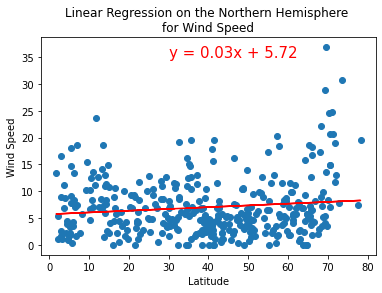

In [87]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \n"
                        "for Wind Speed", 'Wind Speed',(30,35))

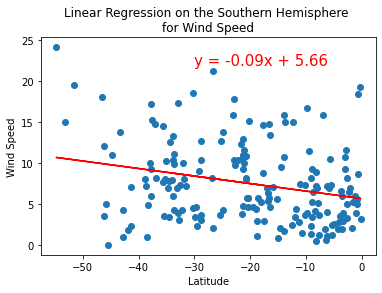

In [91]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Southern Hemisphere \n"
                        "for Wind Speed", 'Wind Speed',(-30,22))